# TODO: 
    Comment code
    Add descriptions and explainations
    Find Alternative Text to Study in Scarlet
        SiS had "weird" word as max and would like to avoid
        AiW seems to have a weird character in it that makes it hard to read
        Aladdin is replaced by giberish
    
# DONE: 
    ELS code generator
    Interactive widget to compare texts
    Overall coding framework

# Finding Pattern in Noise

Data can be found anywhere, but not all of it is useful. For example, the noise contaminating your collected measurements can be seen as a sort of nonsensical and even detrimental data. However, if we deeply examine that noise enough, we can make far-fetched claims about the data, equivilent to grasping at straws. One such practice is searching for Bible Code.

![](data/bible_code_example.png)

Looking for Bible Code is similar to solving a crossword puzzle, as shown above. **Formally, it is looking for a set of equidistantly-spaced characters encoded into a string (typically a sort of text or literature), that form a sort of "secret message."** Notice how in the example above, the highlighted "secret message" has a stride of 15 (ie each letter in the message is seperated by 15 character spaces).

Bible codes can be found in the Bible, Torah, and the Book of Genesis. However, we can apply this search to any string, revealing many (most likely unintentional) secret messages in texts that one wouldn't expect to have any. In this notebook, we will be looking into short works of literature (Franz Kafka's "The Metamorphosis", Lewis Carroll's _Alice in Wonderland_, and the first 11 chapters of Jane Austen's _Sense and Sensibility_) along with pure random gibberish to find these supposed "secret messages." In our app, we will only be looking at "secret messages" in the form of English words only.

## Loading the Text

Reminder, in order to run a block of code in a jupyter notebook, press [shift] + [enter] !

In [1]:
# Importing necessary python packages before doing any coding
import matplotlib.pyplot as plt
import time
import numpy as np
import ipywidgets as widgets

Before we can do any analysis, we have to load and clean the data. In order to detail this process, we will show the steps taken to preprocess Franz Kafka's "The Metamorphosis" before doing any analysis. Firstly we can load the text from the code block below:

In [2]:
f = open('data/metamorphosis.txt', encoding="utf8") # Load the text in from the path provided
metamorphosis = f.read()
f.close()
print(metamorphosis[:500]) # print the first 500 characters in the text

Copyright (C) 2002 David Wyllie.





  Metamorphosis
  Franz Kafka

Translated by David Wyllie



I


One morning, when Gregor Samsa woke from troubled dreams, he found
himself transformed in his bed into a horrible vermin.  He lay on
his armour-like back, and if he lifted his head a little he could
see his brown belly, slightly domed and divided by arches into stiff
sections.  The bedding was hardly able to cover it and seemed ready
to slide off any moment.  His many legs, pitifully thin compa


________________________________

## Preprocessing the Text

After running, you should see the beginning text of the short story. However, you should also notice how there are things that will get in the way of our Bible Code analysis:

1.) There are characters present in the text that are not part of any English words. For example, ( ) and 2 are not part of any English words, and so we can ignore them. 

A solution would be to allow our text only a certain subset of acceptable characters. In our implementation, we will only read characters within "zxcvbnmasdfghjklqwertyuiop-'"

2.) There are changes between uppercase and lowercase which can mess with identifying potential words, since Python does take into account whether a letter is upper or lower case in a string.

A simple solution would be to make the entire text lower case.

Below, you can see how we implement these conditions into code:

In [3]:
def clean_text(string, numbers=False):
    '''
    Given a string as in input, this function will filter out all characters except "zxcvbnmasdfghjklqwertyuiop-'" out of the 
    original input. If numbers == True, then the function will also not filter out digits.
    Inputs:
        string: A string to be preprocessed
    Parameters:
        numbers: If True, will not filter out digits
    Output:
        A filtered version of the original string
    '''
    accept = "zxcvbnmasdfghjklqwertyuiop-'" # list of acceptable characters
    if numbers:
        accept += "1234567890" # if we decide to look for numerical messages, this will add digits into our acceptable characters
    result = ''
    for c in string:
        if c.lower() in accept: # if the lowercase character in the string is present in the list, add it into the result
            result += c.lower()
    return result

metamorphosis = clean_text(metamorphosis)
print(metamorphosis[0:500])

copyrightcdavidwylliemetamorphosisfranzkafkatranslatedbydavidwyllieionemorningwhengregorsamsawokefromtroubleddreamshefoundhimselftransformedinhisbedintoahorribleverminhelayonhisarmour-likebackandifheliftedhisheadalittlehecouldseehisbrownbellyslightlydomedanddividedbyarchesintostiffsectionsthebeddingwashardlyabletocoveritandseemedreadytoslideoffanymomenthismanylegspitifullythincomparedwiththesizeoftherestofhimwavedabouthelplesslyashelookedwhat'shappenedtomehethoughtitwasn'tadreamhisroomaproperhum


___

## Ensuring only English Messages

Before moving on to analysis, we wil do one more step in order to prevent our program to needlessly waste memory. Instead of keeping track of every single combination of characters we encounter when looking for secret messages, we will only memorize English words, which will drastically reduce the amount of memorization our program need to do. In order to do that, we need to have a set of all English words, which be happen to have and will be using in the below code block:

In [4]:
with open("data/english_words.txt") as word_file: # read in the path to the list of english words
    english_words = set(word.strip().lower() for word in word_file) # keep the list of words as a set, as it does not make sense to keep repeated words
print(list(english_words)[:50])

['fire-red', 'banyuls', 'aide', 'oedematous', 'vibration', 'dufterdar', 'rebalance', 'undeadly', 'predamaged', 'dowagerism', 'extrusion', 'picloram', 'trachyphonia', 'yingkow', 'exuberating', 'foreorlop', 'graford', 'incaliculate', 'silver-rag', 'sikes', 'tenantableness', 'unloveable', 'cahoot', 'splashdown', 'erupturient', 'subeth', 'survivor', 'unflutterable', 'chevret', 'rigolette', 'franksville', 'yorgen', 'mispassion', 'nonexcusable', 'zoogenic', 'nectarising', 'whory', 'runa', 'self-relying', 'phagocytism', 'leonard', 'ichnological', 'flavourful', 'knobbling', 'enliveningly', 'buckeroo', 'nativities', 'wlatful', 'calcine', 'pentafid']


In [5]:
def is_english_word(word):
    '''
    A simple function that will check if a given word is an English word, according to the set of English words defined above
    Input:
        word: any string
    Output:
        True if word is in the set of English words, False otherwise
    '''
    return word.lower() in english_words 

print(f"Is 'hello' an english word? {is_english_word('hello')}")
print(f"Is 'lol' an english word? {is_english_word('lol')}")

Is 'hello' an english word? True
Is 'lol' an english word? False


______

## Analyzing the Text and Interpreting the Results

Now we finally have all the tools we need to look for hidden messages. Please take a look at the code block below as it outlines exactly how we look for hidden messages given certain parameters. One important obervation is that the function normalizes the results it gets at the very end, by dividing the number of occurances of a given word by the length of the text. This is because we will be comparing the results of different input strings of differing sizes, and we would like to be able to have meaningful comparisons between the texts. Intuitively, this makes sense, as a text that is twice the length of another would have twice the number of secret messages.

Additionally, the code block will run the function on the preprocessed "Metamorphosis" string. Notice how we have a starting stide of 2 all the way to an ending stride of 100. Can you explain why we don't want to start from a stride-length of 1?

Note: running this function will take anywhere from 1-5 minutes for our given example inputs.

In [6]:
def els_code_generator(stride_start, stride_end, min_word_len, max_word_len, string, lookout_for=[]):
    '''
    This function will return a dictionary with a hidden English word as the key, and the normalized number of times that word
    was found within a given text and all the parameters. A hidden message is defined to be a set of equidistantly-spaced
    characters encoded into the string, that forms an English word.
    
    Note: this function will take anywhere from 1 to 5 minutes to run, for our given example inputs.
    
    Inputs:
        stride_start: the minimum stride length to look for hidden messages
        stride_end: the maximum stride lenth to look for hidden messages
        min_word_len: the minimum word length to search for
        max_word_len: the maximum word length to search for
        string: the preprocessed text to look for hidden messages in
    Parameters:
        lookout_for: a list of strings (not necessarily words), where if encountered as a hidden message in the text, will cause
            print statement saying that it found the given word
    Output:
        A dictionary wil keys corresponding to a found hidden English-word message, and values corresponding to the normalized 
        number of times the word was encountered (ie value = (number of times the word was encontered)/(length of string))
    '''
    t0 = time.time() # Initializing the time, useful in keeping track of how long a function is running
    t1 = t0
    dictionary = {}
    print_mark = round(stride_end/10) # This variable is the interval al which there will be a print statement to update its progress
    l = len(string)
    for k in range(stride_start, stride_end, 1): # Search for hidden messages one stride-length at a time
        for i in range(0, l): # Every character is considered for a potential starting location for a hidden message
            cur = i
            new_text = string[cur]
            while cur < l and len(new_text) <= max_word_len: # stopping conditions: if the starting location is out of bounds, or if the length of the word in exceeded
                if len(new_text) >= min_word_len and is_english_word(new_text): # enforces the min_word_len and is_english_word conditions
                    if new_text in lookout_for: # enforces the lookout_for condition
                        print(f"{new_text}: {k}")
                    if new_text not in dictionary.keys(): # if a given word is not yet added to the result dictionary
                        dictionary[new_text] = 1
                    else:
                        dictionary[new_text] += 1 # if a given word is already in the result dictionary
                cur += k # Increment the starting position by a stride
                if cur < l: 
                    new_text += string[cur] # add to the current word
        if k % print_mark==0: # print the executon time of a given stride
            print(f"finished step {k} in {round(time.time()-t1, 2)}s")
            t1 = time.time()
    print('normalizing results')
    for word in dictionary.keys():
        dictionary[word] = dictionary[word]/l # Normalizing results: this is so that the results of one text will be comprable to another
    print(f"total time: {round(time.time()-t0, 2)}s")
    return dictionary

metamorphosis_dictionary = els_code_generator(2, 100, 0, 10, metamorphosis)

finished step 10 in 6.9s
finished step 20 in 7.98s
finished step 30 in 7.94s
finished step 40 in 7.54s
finished step 50 in 7.79s
finished step 60 in 7.45s
finished step 70 in 7.89s
finished step 80 in 7.54s
finished step 90 in 7.78s
normalizing results
total time: 75.57s


The simple function defined below can help us read through the resulting "Metamorphosis" dictionary by returning the normalized frequency of a specific word:

In [7]:
def check(dictionary, word, state_naw=True):
    '''
    Returns the normalized number of times a word was found in a given hidden-words-dictionary
    Inputs:
        dictionary: a hidden words dictionary corresponding to the output of the els_code_generator function
        word: a string of the word we want to check
    Parameters:
        state_naw: if True: return "not a word" if the word is not an English word. Otherwise, return 0 if the word is not an 
            English word
    Output:
        The normalized number of times a word was found in a given hidden-words-dictionary
    '''
    if not is_english_word(word) and state_naw:
        return "not a word"
    if word in dictionary.keys():
        return dictionary[word]
    return 0

print(f"Normalized number of times 'a' was found in the Metamorphosis text: {check(metamorphosis_dictionary, 'a')}")
print(f"Normalized number of times 'bear' was found in the Metamorphosis text: {check(metamorphosis_dictionary, 'bear')}")
print(f"Normalized number of times 'sensibility' was found in the Metamorphosis text: {check(metamorphosis_dictionary, 'sensibility')}")
print(f"Normalized number of times 'science_sensibility' was found in the Metamorphosis text: {check(metamorphosis_dictionary, 'science_sensibility')}")

Normalized number of times 'a' was found in the Metamorphosis text: 7.364566241183114
Normalized number of times 'bear' was found in the Metamorphosis text: 0.0007884586698489143
Normalized number of times 'sensibility' was found in the Metamorphosis text: 0
Normalized number of times 'science_sensibility' was found in the Metamorphosis text: not a word


Great! Now, lets do the same processing and analysis for all the other works of literature (Lewis Carroll's _Alice in Wonderland_ and Jane Austen's _Sense and Sensibility_)

In [8]:
with open("data/alice_in_wonderland.txt", encoding="utf8") as text:
    alice_wonderland_dictionary = els_code_generator(2, 100, 0, 10, clean_text(text.read()))

finished step 10 in 7.69s
finished step 20 in 8.6s
finished step 30 in 8.72s
finished step 40 in 8.57s
finished step 50 in 8.54s
finished step 60 in 8.57s
finished step 70 in 17.61s
finished step 80 in 8.53s
finished step 90 in 8.7s
normalizing results
total time: 93.26s


In [9]:
with open("data/sense_and_sensibility.txt", encoding="utf8") as text:
    sense_sensibility_dictionary = els_code_generator(2, 100, 0, 10, clean_text(text.read()))

finished step 10 in 5.58s
finished step 20 in 7.18s
finished step 30 in 6.27s
finished step 40 in 6.42s
finished step 50 in 6.15s
finished step 60 in 6.25s
finished step 70 in 6.14s
finished step 80 in 6.08s
finished step 90 in 6.28s
normalizing results
total time: 61.9s


Additionally, we will generate a control text, consisting of a random combination of acceptable characters. We expect that there shouldn't be any intensional hidden messages, since it is completely randomly generated, but many accidental hidden messages arise in what appears to be pure noise.

In [25]:
acceptable_chara = list("zxcvbnmasdfghjklqwertyuiop-'")

giberish = ""
chara = np.random.choice(acceptable_chara, 100000)
for i in chara:
    giberish += i

print(giberish[:500])
print('\n')
giberish_dictionary = els_code_generator(2, 100, 0, 10, clean_text(giberish))

dokzshvbfjzgn'pacjqfdbritwflxixo'stjukxsnubpkghkgayjahi'dpjxvadscq'uvmd-nvv'yjykzkmvnvmzxjtd'mvewmzlonw-eftn''cyoofvafkywr'vepgklhtihmxekdggrhlicndevmjk'actviudilokbdmzgrlffqmlvbelssalrepwt'mirrbo-anwnruyni-zmtvuxzmrjcxnzqpvu-qnypomlgiabwidaz-ptqxeni-eqev'ryzinobs-ngjobcdqpgwlazmdcnjlxrbhulnqnpt-vnzcsnzzqtoptomghofek--jmaiizpgirsuttmnouuvi-olzkuwyaaczaesfr-dnvcgj-urhefjyx'jage-dc'qstciupavyrrsihparrawlhslygnm-brewonfskhs-rn-lgeysa'ogjnrxpuejb-zxp'rc'brqdnshmcqjvoerhvcouxypomisv-zwv'vajrvdhkyfuta


finished step 10 in 7.66s
finished step 20 in 8.72s
finished step 30 in 8.19s
finished step 40 in 8.33s
finished step 50 in 8.39s
finished step 60 in 8.34s
finished step 70 in 8.95s
finished step 80 in 9.66s
finished step 90 in 8.3s
normalizing results
total time: 84.13s


Rather than manually checking the normalized frequence of each word in a given dictionary, another way we can interpret the results would be to find the most statistically significant words of a hidden-words dictionary. This method factors the size of a given word into its "value" (the larger the word, the less probable it is of occuring naturally). 

Can you explain why just finding the largest valued word in a hidden-words dictionary (without handling probability of occurance) wouldn't be particularly useful? What results might you expect if you did this?

In [26]:
def least_probable_words(dictionary):
    '''
    Finds the least probable words of random occurance (ie the most statistically significant words) in a given dictionary
    Input:
        dictionary: a hidden words dictionary corresponding to the output of the els_code_generator function
    Output:
        a list of words that share the highest statistical significance within the dictionary
    '''
    max_val = 0
    max_key = []
    for k in dictionary:
        if dictionary[k]*28**len(k) == max_val: # multiply by 28^len(word) because that is the probability of a given word 
                                                # occuring, since there are only 28 options a character can be after 
                                                # preprocessing
            max_key += [k]
        elif dictionary[k]*28**len(k) > max_val:
            max_key = [k]
            max_val = dictionary[k]*28**len(k)
    return max_key

print(f"least probable hidden words for the Metamorphosis text: {least_probable_words(metamorphosis_dictionary)}")
print(f"least probable hidden words for the Alice in Wonderland text: {least_probable_words(alice_wonderland_dictionary)}")
print(f"least probable hidden words for the Sense and Sensibility text: {least_probable_words(sense_sensibility_dictionary)}")
print(f"least probable hidden words for the giberish text: {least_probable_words(giberish_dictionary)}")

least probable hidden words for the Metamorphosis text: ['hostetter', 'trondheim', 'horseiest', 'patesiate']
least probable hidden words for the Alice in Wonderland text: ['iscariotic']
least probable hidden words for the Sense and Sensibility text: ['rationate', 'trellises']
least probable hidden words for the giberish text: ['onomato-']


_______________

## Comparing Results from Various Texts

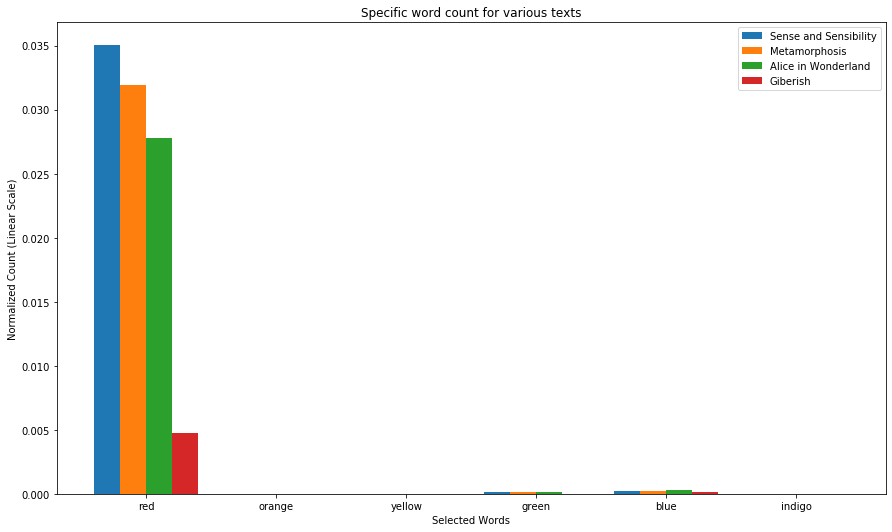

In [47]:
dictionary_options = {'Sense and Sensibility' : sense_sensibility_dictionary,
                     'Metamorphosis' : metamorphosis_dictionary,
                     'Alice in Wonderland' : alice_wonderland_dictionary,
                     'Giberish' : giberish_dictionary}

def compare_word(labels, dictionaries, probability):
    '''
    Plots a bar graph comparing the values of 
    '''
    labels_list = labels.strip().split(' ')
    fig, ax = plt.subplots(figsize=(12.5, 7.5))
    width = 0.2
    shift = 0
    index = np.arange(len(labels_list))
    for dictionary in dictionaries:
        if probability:
            counts = [check(dictionary_options[dictionary], label, False)*28**len(label) for label in labels_list]
        else:
            counts = [check(dictionary_options[dictionary], label, False) for label in labels_list]
        ax.bar(index + shift, counts, width, label=dictionary)
        shift += width
    labels_list = [i if is_english_word(i) else i+" (NAW)" for i in labels_list]
    plt.xticks(index + width*(len(dictionaries)-1)/2, labels_list)
    plt.xlabel('Selected Words')
    if probability:
        plt.ylabel('Normalized Count * Approximate probability of occurance (Log Scale)')
        plt.yscale('log')
    else:
        plt.ylabel('Normalized Count (Linear Scale)')
    plt.title('Specific word count for various texts')
    plt.legend()
    plt.tight_layout()

compare_word('red orange yellow green blue indigo', list(dictionary_options.keys()), False)

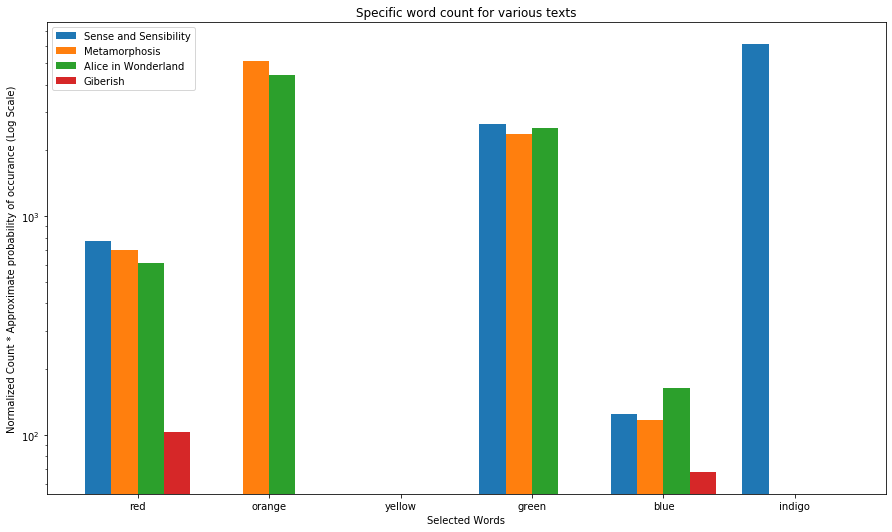

In [49]:
compare_word('red orange yellow green blue indigo', list(dictionary_options.keys()), True)

In [50]:
widgets.interact(compare_word, 
                    labels=widgets.Textarea(value='earth wind fire'), 
                    dictionaries=widgets.widgets.SelectMultiple(options=dictionary_options.keys(), 
                                                                value=list(dictionary_options.keys())),
                    probability=widgets.Checkbox(value=True, description='Multiply probability of occurance'))

interactive(children=(Textarea(value='earth wind fire', description='labels'), SelectMultiple(description='dic…

<function __main__.compare_word(labels, dictionaries, probability)>